# Software profesional en Acústica 2024-25 (M2i)

*This notebook contains a modification of the notebook [FEM_Helmholtz_equation_Robin](https://github.com/spatialaudio/computational_acoustics/blob/master/FEM_Helmholtz_equation_Robin.ipynb), created by Sascha Spors, Frank Schultz, Computational Acoustics Examples, 2018. The text/images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/). The code is released under the [MIT license](https://opensource.org/licenses/MIT).*

# Numerical Solution of the coupling fluid-porous materials with the Darcy model using the Finite Element Method

This notebook illustrates the numerical solution of the wave equation for an harmonic excitation coupling a fluid domain with porous materials using the [Finite Element Method](https://en.wikipedia.org/wiki/Finite_element_method) (FEM). The method aims at an approximate solution by subdividing the area of interest into smaller parts with simpler geometry, linking these parts together and applying methods from the calculus of variations to solve the problem numerically. The FEM is a well established method for the numerical approximation of the solution of partial differential equations (PDEs). The solutions of PDEs are often known analytically only for rather simple geometries. FEM based simulations allow to gain insights into other more complex cases such this coupled fluid-porous problem.

## Problem Statement

The inhomogeneous [Helmholtz equation](https://en.wikipedia.org/wiki/Helmholtz_equation) governs the pressure field in the fluid domain $\Omega_{\mathrm{F}}$ and it is given as

\begin{equation}
\frac{1}{\rho_\mathrm{F}}\Delta P(\mathbf{x}, \omega) + \frac{\omega^2}{\rho_\mathrm{F} c_{\mathrm{F}}^2} P(\mathbf{x}, \omega) = - Q(\mathbf{x}, \omega) \qquad\text{in }\Omega_{\mathrm{F}}.
\end{equation}

The porous domain is goberned by the Darcy porous model, which written in terms of the pressure field, is given by
\begin{equation}
\frac{1}{\rho_\mathrm{F}}\Delta P(\mathbf{x}, \omega) + \frac{\omega^2\phi\gamma}{\rho_\mathrm{F} c_{\mathrm{F}}^2} P(\mathbf{x}, \omega) 
+i\omega\frac{\sigma\phi\gamma}{\rho_\mathrm{F} c_{\mathrm{F}}^2}P(\mathbf{x}, \omega)
= 0 \qquad\text{in }\Omega_{\mathrm{P}},
\end{equation}

where $\phi$ is the porosity, $\sigma$ is the flow resistivity, and $\gamma$ is the ratio of specific heats. The coupling conditions between the porous and fluid domains is expressed in terms of the kinetic and kinematic boundary conditions, the continutity of the pressure fields and the continuity of the normal displacements on the coupling boundary. The boundary conditions are completed assuming rigid boundaries on the rest of the boundary of the computational domain.

## Variational Formulation

Starting from the variational formulation of the Helmholtz equation (before application of Green's first theorem)

\begin{multline*}
\int_{\Omega_{\mathrm{F}}} \frac{1}{\rho_{\mathrm{F}}}\nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  - \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{F}}} P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x \\
+\int_{\Omega_{\mathrm{P}}} \frac{1}{\rho_{\mathrm{F}}}\nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  - \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{P}}} P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x - \frac{i\omega\sigma\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{P}}} P(\mathbf{x}, \omega)V(\mathbf{x}, \omega) \mathrm{d}x
= -\int_{\Omega_{\mathrm{F}}} Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x
\end{multline*}


It is common to express this integral equation in terms of the bilinear $a(P, V)$ and linear $L(V)$ forms 

\begin{equation}
a(P, V) = \int_{\Omega_{\mathrm{F}}} \frac{1}{\rho_{\mathrm{F}}}\nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  - \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{F}}} P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x
+\int_{\Omega_{\mathrm{P}}} \frac{1}{\rho_{\mathrm{P}}}\nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  - \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{P}}} P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x - \frac{i\omega\sigma\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} \int_{\Omega_{\mathrm{P}}} P(\mathbf{x}, \omega)V(\mathbf{x}, \omega) \mathrm{d}x
\end{equation}

\begin{equation}
L(V) = -\int_{\Omega_{\mathrm{F}}} Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x,
\end{equation}

where the variational problem to solve is stated as: Find $P$ such that

\begin{equation}
a(P, V) = L(V)\qquad \forall V.
\end{equation}

Computational implementations of the FEM (like FEniCS) may not be able to handle complex numbers.
In this case the problem can be split into two coupled problems with respect to the real and imaginary part. By introducing $P(\mathbf{x}, \omega) = P_r(\mathbf{x}, \omega) + \mathrm{j} P_i(\mathbf{x}, \omega)$ and $V(\mathbf{x}, \omega) = V_r(\mathbf{x}, \omega) + \mathrm{j} V_i(\mathbf{x}, \omega)$ and identifying the real and imaginary parts of the bilinear and linear forms, we get

\begin{equation}
a_r = \int_{\Omega_{\mathrm{F}}} \left( \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_r(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) -  \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_i(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) - \frac{1}{\rho_{\mathrm{F}}}\nabla P_r(\mathbf{x}, \omega) \cdot \nabla V_r(\mathbf{x}, \omega) + \frac{1}{\rho_{\mathrm{F}}}\nabla P_i(\mathbf{x}, \omega) \cdot \nabla V_i(\mathbf{x}, \omega) \right) \mathrm{d}x
+\int_{\Omega_{\mathrm{P}}} \left( \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_r(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) -  \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_i(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) - \frac{1}{\rho_{\mathrm{F}}}\nabla P_r(\mathbf{x}, \omega) \cdot \nabla V_r(\mathbf{x}, \omega) + \frac{1}{\rho_{\mathrm{F}}}\nabla P_i(\mathbf{x}, \omega) \cdot \nabla V_i(\mathbf{x}, \omega) \right) \mathrm{d}x
-\frac{\omega\sigma\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}}\int_{\Omega_{\mathrm{P}}} \left( V_i(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) + V_r(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) \right) \mathrm{d}x, 
\end{equation}

\begin{equation}
a_i = \int_{\Omega_{\mathrm{F}}} \left( \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_r(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) +  \frac{\omega^2}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_i(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) - \frac{1}{\rho_{\mathrm{F}}}\nabla P_i(\mathbf{x}, \omega) \cdot \nabla V_r(\mathbf{x}, \omega) + \frac{1}{\rho_{\mathrm{F}}}\nabla P_r(\mathbf{x}, \omega) \cdot \nabla V_i(\mathbf{x}, \omega) \right) \mathrm{d}x 
+\int_{\Omega_{\mathrm{P}}} \left( \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_r(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) +  \frac{\omega^2\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}} V_i(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) - \frac{1}{\rho_{\mathrm{F}}}\nabla P_i(\mathbf{x}, \omega) \cdot \nabla V_r(\mathbf{x}, \omega) + \frac{1}{\rho_{\mathrm{F}}}\nabla P_r(\mathbf{x}, \omega) \cdot \nabla V_i(\mathbf{x}, \omega) \right) \mathrm{d}x 
+\frac{\omega\sigma\phi\gamma}{\rho_{\mathrm{F}}c_{\mathrm{F}}^{2}}\int_{\Omega_{\mathrm{P}}} \left( V_r(\mathbf{x}, \omega) P_r(\mathbf{x}, \omega) - V_i(\mathbf{x}, \omega) P_i(\mathbf{x}, \omega) \right) \mathrm{d}s
\end{equation}

for the bilinear form.

## Numerical Solution

The numerical solution of the variational problem is based on [FEniCS](https://fenicsproject.org/), an open-source framework for numerical solution of PDEs.
Its high-level Python interface `dolfin` is used in the following to define the problem and compute the solution.
The implementation is based on the variational formulation derived above.
It is common in the FEM to denote the solution of the problem by $u$ and the test function by $v$.
The definition of the problem in FEniCS is very close to the mathematical formulation of the problem.

For the subsequent examples the solution of inhomogeneous wave equation for a point source $Q(\mathbf{x}) = \delta(\mathbf{x}-\mathbf{x_s})$ at position $\mathbf{x_s}$ is computed using the FEM.
A function is defined for this purpose, as well as for the plotting of the resulting sound field.

In [1]:
import dolfin
import mshr
import numpy as np
import matplotlib.pyplot as plt

def fluid_porous(mesh, frequency, xs, sigma=0.):
    
    # Define subdomain markers and integration measure
    dx = dolfin.Measure('dx', domain=mesh)

    # squared wavenumber
    omega = 2*dolfin.pi*frequency
    rhoF = 1.21 # mass density in the fluid
    bulkF = rhoF*343**2 # bulk modulus in the fluid
    phi = 0.9 # porosity
    gamma = 1.4 # ratio of specific heats
    bulkP = rhoF*343**2/phi/gamma # bulk modulus in the porous material
            
    # Coefficients of the variational formulation        
    rho = dolfin.Expression('fabs(x[0]-cx) > Lx ? valueF : valueP', cx=3.25, Lx=0.25, valueF=rhoF, valueP=rhoF, degree=0)
    bulk = dolfin.Expression('fabs(x[0]-cx) > Lx ? valueF : valueP', cx=3.25, Lx=0.25, valueF=bulkF, valueP=bulkP, degree=0)
    resis = dolfin.Expression('fabs(x[0]-cx) > Lx ? valueF : valueP', cx=3.25, Lx=0.25, valueF=0., valueP=sigma, degree=0)
    
    # Define function space (Lagrange 1st polynomials)
    P1 = dolfin.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
    V = dolfin.FunctionSpace(mesh, P1 * P1)

    # define variational problem
    (u_r, u_i) = dolfin.TrialFunction(V)
    (v_r, v_i) = dolfin.TestFunction(V)

    # Variational terms
    a_r = (omega**2/bulk * dolfin.inner(u_r,v_r) - omega**2/bulk * dolfin.inner(u_i,v_i) - (1/rho) * dolfin.inner(dolfin.grad(u_r), dolfin.grad(v_r)) + (1/rho) * dolfin.inner(dolfin.grad(u_i), dolfin.grad(v_i)) - omega*resis/bulk*dolfin.inner(u_r, v_i) - omega*resis/bulk*dolfin.inner(u_i, v_r) ) * dolfin.dx
    a_i = (omega**2/bulk * dolfin.inner(u_r,v_i) + omega**2/bulk * dolfin.inner(u_i,v_r) - (1/rho) * dolfin.inner(dolfin.grad(u_r), dolfin.grad(v_i)) - (1/rho) * dolfin.inner(dolfin.grad(u_i), dolfin.grad(v_r)) + omega*resis/bulk*dolfin.inner(u_r, v_r) - omega*resis/bulk*dolfin.inner(u_i, v_i) ) * dolfin.dx
    
    # Null volumetric source term
    L_r = dolfin.Constant(0) * v_r * dolfin.dx
    L_i = dolfin.Constant(0) * v_i * dolfin.dx

    # Complete variational formulation and assembly
    a = a_r + a_i
    L = L_r + L_i
    A, b = dolfin.assemble_system(a, L)

    # define inhomogenity
    delta = dolfin.PointSource(V.sub(0), xs, -1)  # negative amplitude accounts for -Q(x,w) in inhomogeneous wave equation
    delta.apply(b)

    # compute solution
    sol = dolfin.Function(V)
    dolfin.solve(A, sol.vector(), b)
    (sol_re, sol_im) = sol.split(True)
    sol_re.rename("Re(u)", "Real FE approx.")
    sol_im.rename("Im(u)", "Imag. FE approx.")
    
    return sol_re, sol_im


def plot_soundfield(u):
    '''plots solution of FEM-based simulation'''
    fig = plt.figure(figsize=(10,10))
    fig = dolfin.plot(u)
    plt.title(r'$P(\mathbf{x}, \omega)$')
    plt.xlabel(r'$x$ in m')
    plt.ylabel(r'$y$ in m')
    plt.colorbar(fig, fraction=0.038, pad=0.04);

### Sound Field transmitted through a layer of porous material

Two 2D-dimensional rooms are connected by a layer of porous material. The porous layer decrease the amplitude of the pressure field and the sound power level is computed on both rooms to check the efficiency absorbing the incident pressure generated by a point source in the left room

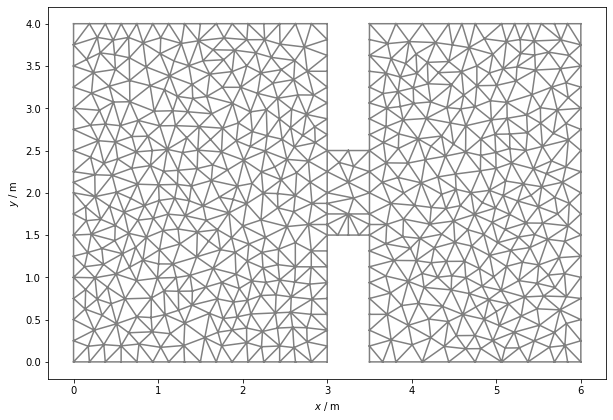

In [2]:
# define geometry and mesh
domain_fluid_input = mshr.Rectangle(dolfin.Point(0, 0), dolfin.Point(3,4))
domain_fluid_output = mshr.Rectangle(dolfin.Point(3.5, 0), dolfin.Point(6, 4))
domain_porous = mshr.Rectangle(dolfin.Point(3, 1.5), dolfin.Point(3.5, 2.5))
domain = domain_fluid_input + domain_fluid_output + domain_porous

# Marking the subdomains of the fluid
domain.set_subdomain(1, domain_fluid_input)
domain.set_subdomain(2, domain_fluid_output)
domain.set_subdomain(3, domain_porous)

# Build the mesh
mesh = mshr.generate_mesh(domain, 20)

# Plot the mesh
fig = plt.figure(figsize=(10,10))
fig = dolfin.plot(mesh)
plt.xlabel(r'$x$ / m')
plt.ylabel(r'$y$ / m');

The two-dimensional sound field in a rectangular room (rectangular plate) with homogeneous Robin boundary conditions is computed for the frequency $f=120$ Hz and source position $x_s = (1.2,3.2)$ m.

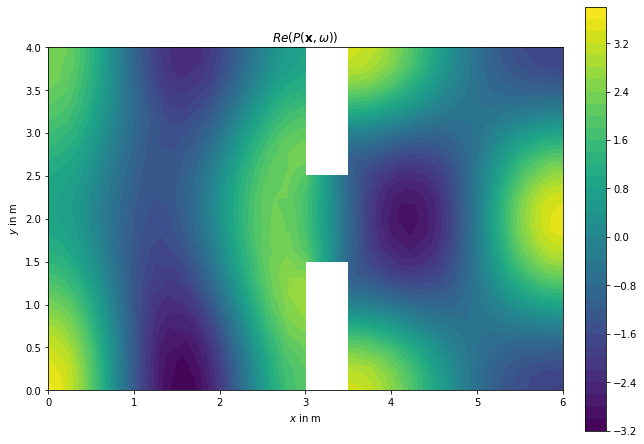

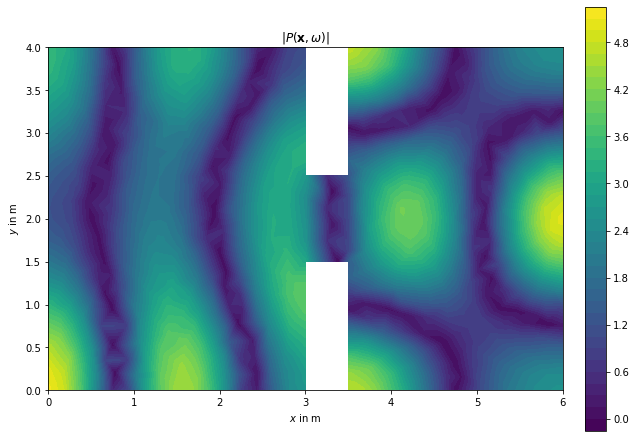

In [3]:
f = 120.0  # frequency
xs = dolfin.Point(1.2, 3.2)  # source position

# compute solution for sigma=0: no porous material in the brick
sol_re, sol_im = fluid_porous(mesh, f, xs, sigma=0.)

# plot sound field: real part
plot_soundfield(sol_re)
plt.title(r'$Re(P(\mathbf{x}, \omega))$')

# plot sound field: magnitude
plot_soundfield(dolfin.sqrt(sol_re**2+sol_im**2))
plt.title(r'$|P(\mathbf{x}, \omega)|$');

Compute the sound pressure level (SPL) in the output and input room

In [4]:
markers = dolfin.MeshFunction('size_t', mesh, 2, mesh.domains())
dx = dolfin.Measure('dx', domain=mesh, subdomain_data=markers)
p_ref = 20e-6 # Reference pressure
SPL_input = 20*np.log10(dolfin.assemble(dolfin.sqrt(sol_re**2+sol_im**2)*dx(1))/p_ref)
SPL_output = 20*np.log10(dolfin.assemble(dolfin.sqrt(sol_re**2+sol_im**2)*dx(2))/p_ref)
print('SPL in the input room without porous material:', SPL_input,'dB')
print('SPL in the output room without porpous material:', SPL_output,'dB')

SPL in the input room without porous material: 121.05318021023506 dB
SPL in the output room without porpous material: 119.05574030564948 dB


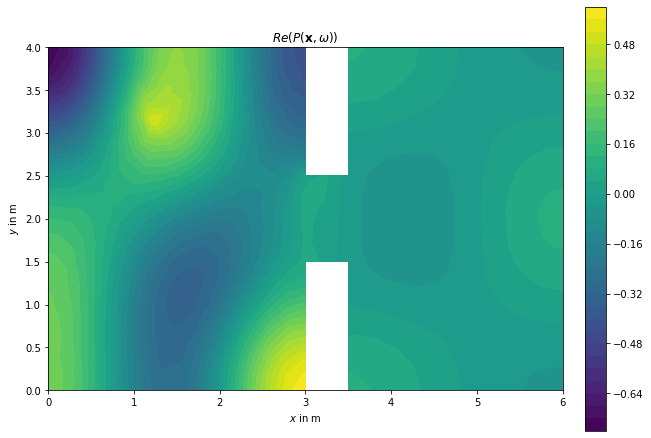

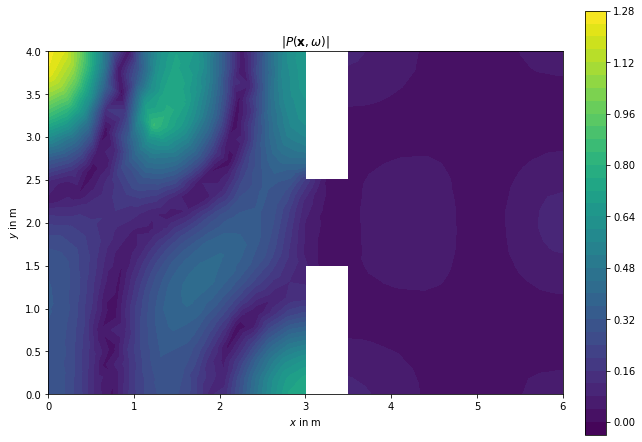

In [5]:
f = 120.0  # frequency
xs = dolfin.Point(1.2, 3.2)  # source position

# compute solution for sigma=0: no porous material in the brick
sol_re, sol_im = fluid_porous(mesh, f, xs, sigma=1e4)

# plot sound field: real part
plot_soundfield(sol_re)
plt.title(r'$Re(P(\mathbf{x}, \omega))$')

# plot sound field: magnitude
plot_soundfield(dolfin.sqrt(sol_re**2+sol_im**2))
plt.title(r'$|P(\mathbf{x}, \omega)|$');

Compute the SPL values associated with the input and output room, and the insertion loss (IL) values 

In [6]:
markers = dolfin.MeshFunction('size_t', mesh, 2, mesh.domains())
dx = dolfin.Measure('dx', domain=mesh, subdomain_data=markers)
p_ref = 20e-6 # Reference pressure
SPL_input_porous = 20*np.log10(dolfin.assemble(dolfin.sqrt(sol_re**2+sol_im**2)*dx(1))/p_ref)
SPL_output_porous = 20*np.log10(dolfin.assemble(dolfin.sqrt(sol_re**2+sol_im**2)*dx(2))/p_ref)
print('SPL in the input room with porous material:', SPL_input_porous,'dB')
print('SPL in the output room with porous material:', SPL_output_porous,'dB')

# Insertion loss
IL = SPL_output - SPL_output_porous
print('Insersion loss (IL):', IL,'dB')

SPL in the input room with porous material: 105.28336419511174 dB
SPL in the output room with porous material: 84.23460052103906 dB
Insersion loss (IL): 34.82113978461042 dB


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).